LAB5

<p>Name: Kushal Sourav B</p>
<p>Regno: 2347125</p>

### Displaying the Images

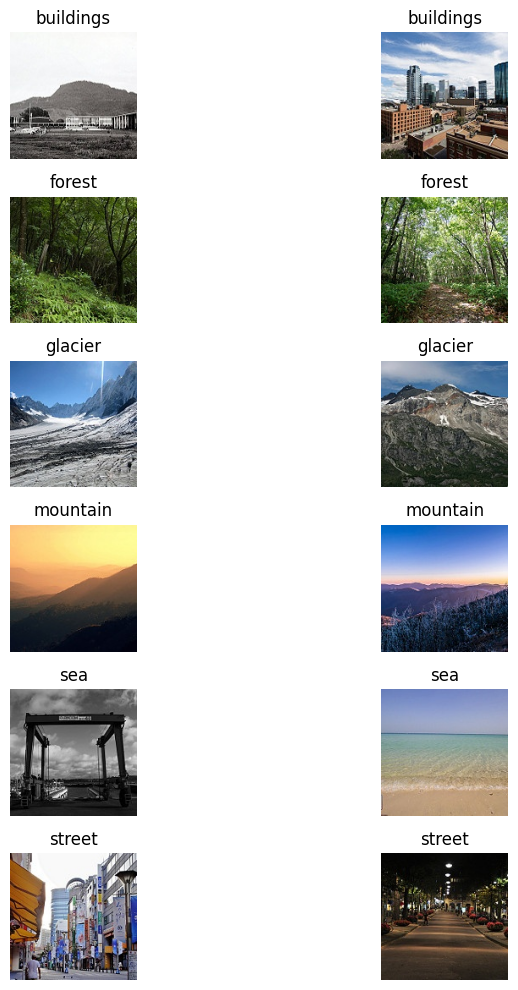

In [2]:
import matplotlib.pyplot as plt
import os
from PIL import Image

def display_samples(dataset_dir, categories, num_samples=2):
    fig, axes = plt.subplots(len(categories), num_samples, figsize=(10, 10))
    for i, category in enumerate(categories):
        folder = os.path.join(dataset_dir, category)
        for j in range(num_samples):
            img_path = os.path.join(folder, os.listdir(folder)[j])
            img = Image.open(img_path)
            axes[i, j].imshow(img)
            axes[i, j].set_title(category)
            axes[i, j].axis('off')
    plt.tight_layout()
    plt.show()


categories = ['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']
display_samples('dataset/seg_train/seg_train/', categories)


### Model Architecture:

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization

model = Sequential()

# 1st Convolutional Block
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())

# 2nd Convolutional Block
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())

# 3rd Convolutional Block
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())

# Fully Connected Layers
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(6, activation='softmax')) 


c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### Model Training:

In [12]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Image Data Augmentation
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)  # 80/20 split

train_generator = train_datagen.flow_from_directory(
    'dataset/seg_train/seg_train/',
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='training')

validation_generator = train_datagen.flow_from_directory(
    'dataset/seg_train/seg_train/',
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='validation')

# Compile model
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(train_generator, epochs=20, validation_data=validation_generator)


Found 11230 images belonging to 6 classes.
Found 2804 images belonging to 6 classes.
Epoch 1/20


c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


351/351 ━━━━━━━━━━━━━━━━━━━━ 315s 884ms/step - accuracy: 0.4831 - loss: 5.0357 - val_accuracy: 0.3531 - val_loss: 6.9323
Epoch 2/20
351/351 ━━━━━━━━━━━━━━━━━━━━ 249s 709ms/step - accuracy: 0.5745 - loss: 1.4792 - val_accuracy: 0.6455 - val_loss: 1.2076
Epoch 3/20
351/351 ━━━━━━━━━━━━━━━━━━━━ 234s 666ms/step - accuracy: 0.6516 - loss: 0.9739 - val_accuracy: 0.6740 - val_loss: 1.1260
Epoch 4/20
351/351 ━━━━━━━━━━━━━━━━━━━━ 253s 721ms/step - accuracy: 0.7071 - loss: 0.8253 - val_accuracy: 0.7496 - val_loss: 0.7145
Epoch 5/20
351/351 ━━━━━━━━━━━━━━━━━━━━ 245s 696ms/step - accuracy: 0.7432 - loss: 0.7367 - val_accuracy: 0.7568 - val_loss: 0.8130
Epoch 6/20
351/351 ━━━━━━━━━━━━━━━━━━━━ 284s 810ms/step - accuracy: 0.7556 - loss: 0.6726 - val_accuracy: 0.7739 - val_loss: 0.7900
Epoch 7/20
351/351 ━━━━━━━━━━━━━━━━━━━━ 263s 748ms/step - accuracy: 0.7719 - loss: 0.6267 - val_accuracy: 0.7846 - val_loss: 0.6722
Epoch 8/20
351/351 ━━━━━━━━━━━━━━━━━━━━ 244s 694ms/step - accuracy: 0.7963 - loss: 0.56

### Evaluation:

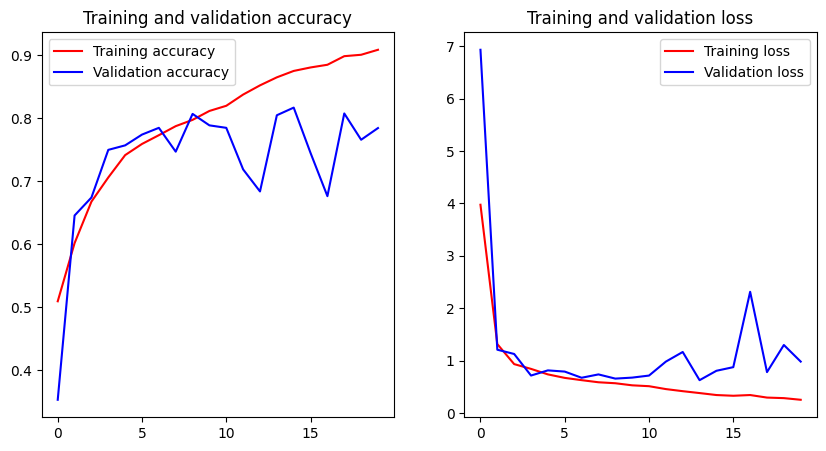

In [13]:
import matplotlib.pyplot as plt

def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    
    epochs = range(len(acc))
    
    plt.figure(figsize=(10,5))
 
    plt.subplot(1,2,1)
    plt.plot(epochs, acc, 'r', label='Training accuracy')
    plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
    plt.title('Training and validation accuracy')
    plt.legend()
    

    plt.subplot(1,2,2)
    plt.plot(epochs, loss, 'r', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()
    
    plt.show()

plot_history(history)


88/88 ━━━━━━━━━━━━━━━━━━━━ 13s 147ms/step


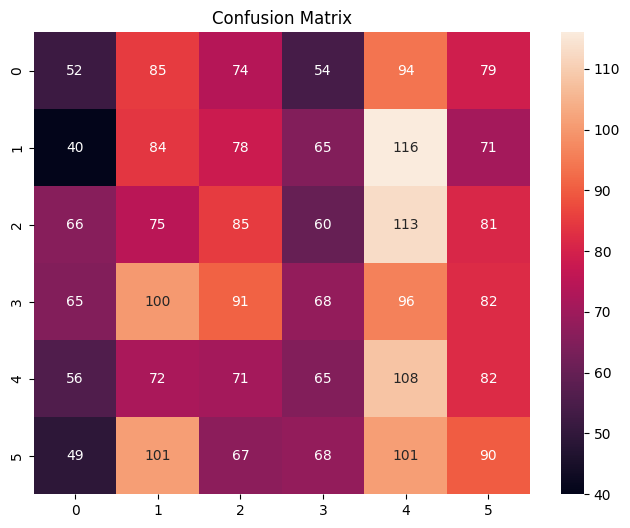

In [15]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np


Y_pred = model.predict(validation_generator)
y_pred = np.argmax(Y_pred, axis=1)


cm = confusion_matrix(validation_generator.classes, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.show()


### Optimization

In [4]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2)

train_generator = train_datagen.flow_from_directory(
    'dataset/seg_train/seg_train/',
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='training')

validation_generator = train_datagen.flow_from_directory(
    'dataset/seg_train/seg_train/',
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='validation')

# Compile model
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(train_generator, epochs=20, validation_data=validation_generator)


Found 11230 images belonging to 6 classes.
Found 2804 images belonging to 6 classes.
Epoch 1/20


c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


351/351 ━━━━━━━━━━━━━━━━━━━━ 315s 885ms/step - accuracy: 0.3856 - loss: 5.5625 - val_accuracy: 0.3566 - val_loss: 3.0143
Epoch 2/20
351/351 ━━━━━━━━━━━━━━━━━━━━ 246s 699ms/step - accuracy: 0.4612 - loss: 1.4952 - val_accuracy: 0.5357 - val_loss: 1.2523
Epoch 3/20
351/351 ━━━━━━━━━━━━━━━━━━━━ 254s 720ms/step - accuracy: 0.5257 - loss: 1.2428 - val_accuracy: 0.4722 - val_loss: 1.6088
Epoch 4/20
351/351 ━━━━━━━━━━━━━━━━━━━━ 270s 768ms/step - accuracy: 0.5670 - loss: 1.1505 - val_accuracy: 0.6205 - val_loss: 0.9796
Epoch 5/20
351/351 ━━━━━━━━━━━━━━━━━━━━ 254s 722ms/step - accuracy: 0.6081 - loss: 1.0669 - val_accuracy: 0.5068 - val_loss: 1.2464
Epoch 6/20
351/351 ━━━━━━━━━━━━━━━━━━━━ 254s 721ms/step - accuracy: 0.6156 - loss: 1.0243 - val_accuracy: 0.4900 - val_loss: 1.5121
Epoch 7/20
351/351 ━━━━━━━━━━━━━━━━━━━━ 269s 763ms/step - accuracy: 0.6279 - loss: 1.0115 - val_accuracy: 0.5849 - val_loss: 1.0594
Epoch 8/20
351/351 ━━━━━━━━━━━━━━━━━━━━ 263s 746ms/step - accuracy: 0.6491 - loss: 0.94

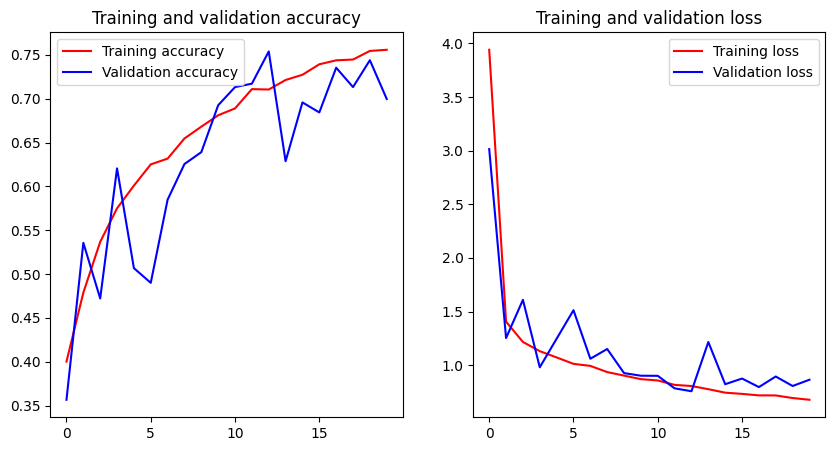

In [5]:
import matplotlib.pyplot as plt

def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    
    epochs = range(len(acc))
    
    plt.figure(figsize=(10,5))
 
    plt.subplot(1,2,1)
    plt.plot(epochs, acc, 'r', label='Training accuracy')
    plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
    plt.title('Training and validation accuracy')
    plt.legend()
    

    plt.subplot(1,2,2)
    plt.plot(epochs, loss, 'r', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()
    
    plt.show()

plot_history(history)


88/88 ━━━━━━━━━━━━━━━━━━━━ 19s 216ms/step


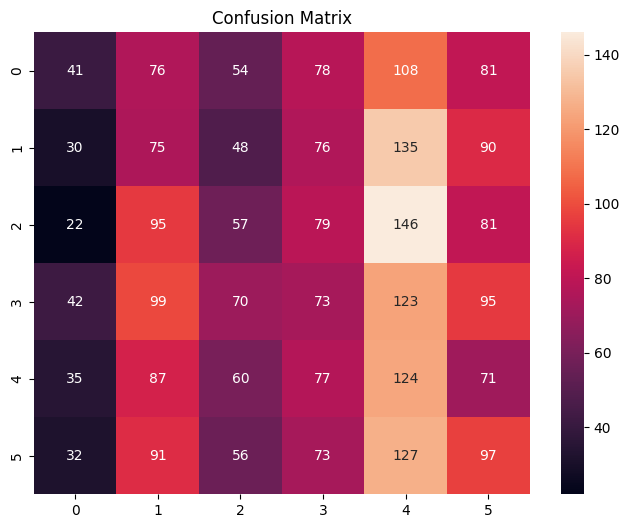

In [6]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np


Y_pred = model.predict(validation_generator)
y_pred = np.argmax(Y_pred, axis=1)


cm = confusion_matrix(validation_generator.classes, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.show()
